In [1]:
!pip3 install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 12.5 MB/s eta 0:00:00


In [2]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub.")
print(f"The following datasets are available: {all_datasets[:100]}")


<ipython-input-2-909095113f9a>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 69773 datasets currently available on the Hub.
The following datasets are available: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami', 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'bigIR/ar_cov19', 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect', 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset', 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic', 'autshumato', 'facebook/babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli', 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent', 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blbooks', 'blbooksgenre', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bn_hate_speech', '

In [3]:
from datasets import load_dataset

emotions = load_dataset("emotion")



Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions['train']
len(train_ds)
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [6]:
train_ds.column_names
type(train_ds)

datasets.arrow_dataset.Dataset

In [7]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [8]:
train_ds[:5]["label"]

[0, 0, 3, 2, 3]

In [9]:
import pandas as pd

## This changes the output format of the `Dataset`
## Pandas for better visualization
emotions.set_format(type="pandas")

df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [10]:
def label_int2str(row):
  # type datasets.features.features.ClassLabel,
  # https://huggingface.co/docs/datasets/v2.14.5/en/package_reference/main_classes#datasets.ClassLabel
  # int2str: conversion integer => class name string
  return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [11]:
type(df["label"][0])
type(emotions["train"].features["label"])

datasets.features.features.ClassLabel

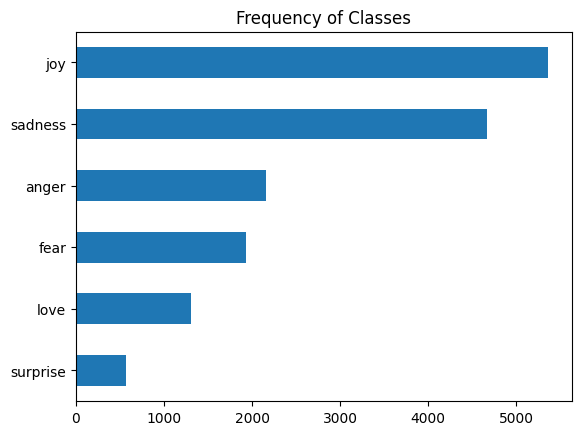

In [12]:
import matplotlib.pyplot as plt

# value_counts: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
# plot_barh, returns `matplotlib.axes._axes.Axes` instance
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()


matplotlib.axes._axes.Axes

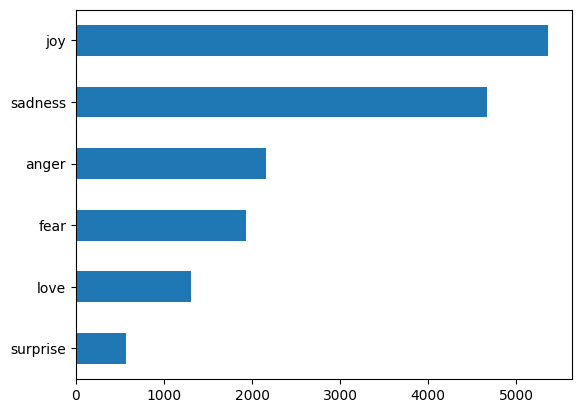

In [13]:
type(df["label_name"].value_counts(ascending=True).plot.barh())

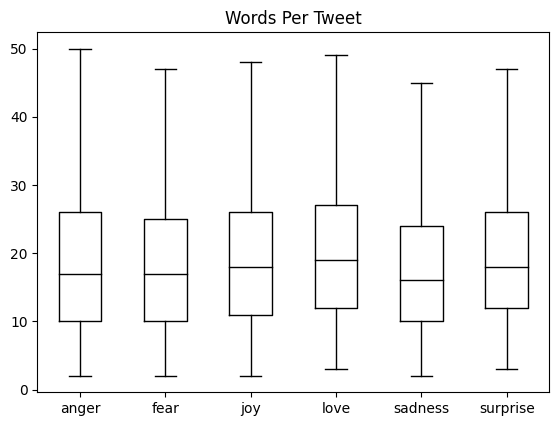

In [14]:
# .str: makes it easy to apply string methods
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()


In [15]:
type(df["text"].str)

pandas.core.strings.accessor.StringMethods

In [16]:
# reset output format to Arrow (previously it is pandas.DataFrame)
emotions.reset_format()

In [17]:
text = "Tokenizing text is a core task of NLP."

## skipped character tokenization.


(Skipped character tokenization, not really feasible because of attention cost to learn the linguistic concept of word, boundary, etc. Probably referring to attension memory cost for long context size.)

## Word Tokenization
Can easily grow to million-level words, for 1000 dimension for the input embedding, ~1 billion parameters for the word embeddings along. Not feasible either.

## Subword Tokenization
*learned* from the pre-training corpus using a mix of statistical rules and algorithms.



In [18]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [19]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)



(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [20]:
encoded_text = tokenizer(text)
print(encoded_text)


{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [21]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)


['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [22]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [23]:
tokenizer.vocab_size

30522

In [24]:
# corresponding model's (distilbert-base-uncased) maximum context size
tokenizer.model_max_length

512

In [25]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## Tokenizing the Whole Dataset


In [26]:
def tokenize(batch):
  ## padding: pads 0 to the longest one in the batch
  ## truncation: truncate the examples to the model's maximum context size
  return tokenizer(batch["text"], padding=True, truncation=True)

In [27]:
emotions["train"][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [28]:
# "attention mask" allows the model to ignore the padded parts of the input
# [CLS]: start, [SEP] end
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [29]:
# batch_size=None means the whole dataset as a single batch
# map() function, applies the function and updates the "table" or dict.
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [30]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [31]:
len(emotions_encoded["train"]["input_ids"])

16000

## Transformers as Feature Extractors

In [32]:
import torch
print(f"cuda is available: {torch.cuda.is_available()}")


cuda is available: True


In [33]:
# Use pretrained models
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [34]:
# extracting the last hidden states
# test
text = ["this is a test", "this is a test 2"]
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([2, 7])


In [35]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102,    0],
        [ 101, 2023, 2003, 1037, 3231, 1016,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1]]))])

In [36]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-1.5651e-01, -1.8620e-01,  5.2777e-02,  ..., -1.1881e-01,
           6.6206e-02,  5.4702e-01],
         [-3.5751e-01, -6.4836e-01, -6.1790e-02,  ..., -3.0402e-01,
           3.5077e-01,  5.2207e-01],
         [-2.7718e-01, -4.4594e-01,  1.8184e-01,  ..., -9.4780e-02,
          -7.5747e-03,  9.9583e-01],
         ...,
         [ 2.6608e-01, -5.0936e-01, -3.1801e-01,  ..., -4.2030e-01,
           1.4442e-02, -2.1489e-01],
         [ 9.4406e-01,  1.1173e-02, -4.7139e-01,  ...,  1.4395e-01,
          -7.2878e-01, -1.6195e-01],
         [ 3.5223e-02, -3.8834e-01,  1.6068e-02,  ...,  2.2119e-02,
           1.9003e-02,  4.1007e-01]],

        [[-1.9796e-01, -1.9870e-01,  1.2966e-01,  ..., -1.6362e-01,
           1.2042e-01,  4.8292e-01],
         [-5.4778e-01, -7.3063e-01,  1.4806e-01,  ..., -3.7753e-01,
           4.0707e-01,  3.9131e-01],
         [-4.1644e-01, -5.5917e-01,  3.1150e-01,  ..., -8.0308e-02,
           1.5484e-01,  9.5355e-01],
     

In [37]:
# hidden state size / shape
outputs.last_hidden_state.size()

torch.Size([2, 7, 768])

## Explanation: tensor[:0] for a 3-dimension tensor:

A 3-dimensional tensor can be thought of as a stack of matrices. The first dimension often represents the "depth" or the number of such matrices, the second dimension can represent the rows, and the third dimension can represent the columns (but these interpretations might vary based on the specific use case).

Let's consider a 3D tensor of shape `(2, 3, 4)`:
```python
import torch

tensor = torch.tensor([
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12]
    ],
    [
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]
    ]
])
```

This tensor can be visualized as having two "depth slices" (2 matrices) where each slice has 3 rows and 4 columns.

Now, when you index the tensor using `tensor[:, 0]`:

- `:` means you are taking all elements along the first dimension (both depth slices).
- `0` means you are taking only the first row from each matrix.
- You're implicitly selecting everything from the last dimension since you haven't specified any index or slice for it.

The resulting tensor will be of shape `(2, 4)` and will contain:
```
[
 [1, 2, 3, 4],
 [13, 14, 15, 16]
]
```

So, `tensor[:, 0]` extracts the first row from each matrix (each depth slice) in the 3D tensor. Essentially, you're extracting a horizontal cross-section from each depth slice at the first row.

In [38]:
# Get only the hidden state for the [CLS] token.
# get the first row (first token's hidden state) in the second dimension
# get all column values for that first row
outputs.last_hidden_state[:, 0].size()

torch.Size([2, 768])

In [39]:
def extract_hidden_states(batch):
  # Place model inputs on GPU if possible
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  # Extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [40]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [41]:
# batched=True: default batch_size=1000 is used instead
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [42]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [43]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape, y_train.size, y_valid.size

((16000, 768), (2000, 768), 16000, 2000)

### Visualizing the training set

In [44]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=c29a665a60d94e30db17adbef2d5dd9705f015bc2383fb5614c6396314491987
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=2795fb2dc64f1ff151bfb42d0d1a8c6237e378dce95f8148402947950420ee51
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [45]:
# Use the UMAP algorithm to project the vectors down to 2D.
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.540143,6.736965,0
1,-2.897097,5.652716,0
2,5.707016,3.287865,3
3,-2.075605,3.635371,2
4,-3.088525,3.824546,3


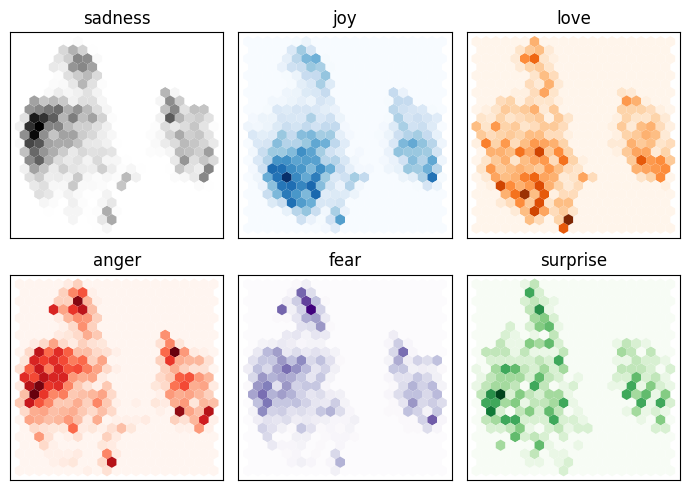

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                 gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

### Training a simple classifier (original BERT unchanged).

In [47]:
# logistic regression model using scikit learn, no need to use GPU
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
# lr_clf = LogisticRegression(max_iter=3000)
# lr_clf.fit(X_train, y_train)
# Save to reduce running time
# lr_clf.score(X_valid, y_valid)

In [48]:
from sklearn.dummy import DummyClassifier

# as a dumb baseline, use DummyClassifier and choose the most frequent label always
# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X_train, y_train)
# dummy_clf.score(X_valid, y_valid)

In [49]:
# build a confusion matrix for further analysis false predictions
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

# y_preds = lr_clf.predict(X_valid)
# plot_confusion_matrix(y_preds, y_valid, labels)

## Fine-Tuning Transformers
- Requies GPUs, computationally heavy
- Here we uses `Trainer` API from HuggingFace Transformers

In [50]:
# Use AutoModelForSequenceClassification instead of AutoModel
# because
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
# Defining performance metrics `compute_metrics()` function
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}



In [52]:
!pip install 'huggingface_hub[cli,torch]'
!pip install -U huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.4 MB/s eta 0:00:00
  Using cached huggingface_hub-0.18.0-py3-none-any.whl (301 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tokenizers 0.14.1 requires huggingface_hub<0.18,>=0.16.4, but you have huggingface-hub 0.18.0 which is incompatible.


In [53]:
# use pip to install in Colab
from huggingface_hub import notebook_login
notebook_login()

In [54]:
!pip install accelerate -U

In [55]:
# TrainingArguments class
# if seeing error to input TypedDict from _types.py, needs to upgrade
# huggingface_hub to newest version
# https://github.com/huggingface/transformers/issues/26352#issuecomment-1733374806
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion-test"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [57]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.857500,0.332820,0.899500,0.897711
2,0.256400,0.224610,0.918000,0.918222


In [58]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.22460995614528656,
 'test_accuracy': 0.918,
 'test_f1': 0.9182221939904688,
 'test_runtime': 4.0862,
 'test_samples_per_second': 489.458,
 'test_steps_per_second': 7.831}

In [59]:
# np.argmax documentation: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
y_preds = np.argmax(preds_output.predictions, axis=1)


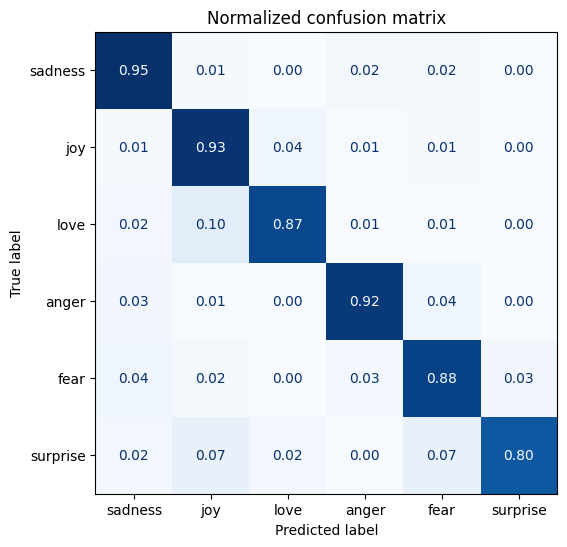

In [60]:
plot_confusion_matrix(y_preds, y_valid, labels)

## Error analysis

In [61]:
# calculate loss given the label.
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  # Place all input tensors on the same device as the model
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                         reduction="none")
  # Place outputs on CPU for compatibility with other dataset columns
  return {
      "loss": loss.cpu().numpy(),
      "predicted_label": pred_label.cpu().numpy()
  }

In [62]:
# use map() method to apply this function to get the losses for all the samples

# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16
)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [63]:
# peek the losses
emotions_encoded["validation"][:5]

{'label': tensor([0, 0, 2, 3, 1]),
 'input_ids': tensor([[  101, 10047,  3110,  3243,  6517,  1998,  3374,  2005,  2870,  2021,
           5665, 10245,  2041,  1997,  2009,  2574,   102,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0],
         [  101,  1045,  2514,  2066,  1045,  2572,  2145,  2559,  2012,  1037,
           8744, 10683,  8744,  4109,  1997,  3259,   102,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0

In [64]:
# create a `DataFrame` with texts, losses, and predicted / true labels
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [65]:
# check current cpu this notebook is using (Copilot)
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.130
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [66]:
# check memory size this notebook is using (Copilot)
!cat /proc/meminfo

MemTotal:       13294208 kB
MemFree:          854672 kB
MemAvailable:    7151136 kB
Buffers:          104484 kB
Cached:          6363396 kB
SwapCached:            0 kB
Active:          1389612 kB
Inactive:       10475596 kB
Active(anon):       2308 kB
Inactive(anon):  5431036 kB
Active(file):    1387304 kB
Inactive(file):  5044560 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2796 kB
Writeback:             0 kB
AnonPages:       5397200 kB
Mapped:          1286448 kB
Shmem:             36148 kB
KReclaimable:     190020 kB
Slab:             253132 kB
SReclaimable:     190020 kB
SUnreclaim:        63112 kB
KernelStack:        4868 kB
PageTables:        79048 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647104 kB
Committed_AS:    5278532 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       77648 kB
VmallocChunk:          0 kB
Percpu:          

In [67]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,6.004457
1950,i as representative of everything thats wrong ...,surprise,sadness,5.953527
1963,i called myself pro life and voted for perry w...,joy,sadness,5.396989
1801,i feel that he was being overshadowed by the s...,love,sadness,5.364231
1509,i guess this is a memoir so it feels like that...,joy,fear,5.256103
1274,i am going to several holiday parties and i ca...,joy,sadness,5.083826
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.023211
1111,im lazy my characters fall into categories of ...,joy,fear,5.007220
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.920111
465,i would eventually go in to these stores but i...,joy,fear,4.741779


In [68]:
df_test.sort_values("loss", ascending=True).head(10)
# all of them are the label sadness, could be suspicious

,text,label,predicted_label,loss
578,i got to christmas feeling positive about the ...,joy,joy,0.016627
604,i don t like to use the h word recklessly but ...,joy,joy,0.016643
1320,im feeling positive but its impossible to desc...,joy,joy,0.016714
1154,i love feeling carefree and without all these ...,joy,joy,0.016734
1873,i feel practically virtuous this month i have ...,joy,joy,0.016847
1263,i feel this way about blake lively,joy,joy,0.017080
632,i feel he is an terrific really worth bet,joy,joy,0.017108
456,im feeling rather festive here in south florida,joy,joy,0.017218
856,i feel is more energetic in urban singapore th...,joy,joy,0.017234
19,i had lunch with an old friend and it was nice...,joy,joy,0.017250


In [68]:
trainer.push_to_hub(commit_message="Training completed!")

In [69]:
# Use the published model
from transformers import pipeline

# change to your username
user_name = "yibinlin"
model_id = f"{user_name}/{model_ckpt}-finetuned-emotion-test"
classifier = pipeline("text-classification", model=model_id)

(…)ed-emotion-test/resolve/main/config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

(…)-test/resolve/main/tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

(…)uned-emotion-test/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)emotion-test/resolve/main/tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

(…)tion-test/resolve/main/added_tokens.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

(…)est/resolve/main/special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [100]:
custom_tweet = "I saw a movie today and it was really good"
# UserWarning: `return_all_scores` is now deprecated,  if want a similar
# functionality use `top_k=None` instead of `return_all_scores=True` or
# `top_k=1` instead of `return_all_scores=False`.
preds = classifier(custom_tweet, top_k=None)
# sort by model's original label list order
preds.sort(key=lambda x: x["label"])
preds_df = pd.DataFrame(preds)
preds_df

,label,score
0,LABEL_0,0.020822
1,LABEL_1,0.944571
2,LABEL_2,0.009419
3,LABEL_3,0.009935
4,LABEL_4,0.007169
5,LABEL_5,0.008084


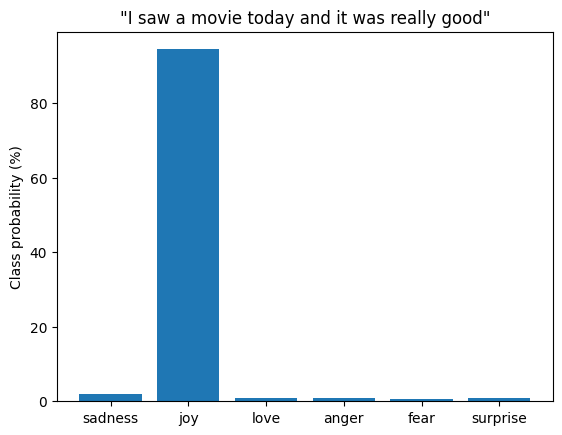

In [101]:
# convert the pred label and plot
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()